### Importing Packages and Load Data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
data = pd.read_csv('./Social_Network_Ads.csv')

In [38]:
data = data.iloc[:,2:]

In [4]:
data.sample(5)

,Age,EstimatedSalary,Purchased
218,46,96000,0
83,35,88000,0
250,44,39000,0
287,48,138000,1
262,55,125000,1


### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis=1),data['Purchased'],test_size=0.3,random_state=0)

### Standard Scalar

In [6]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [7]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

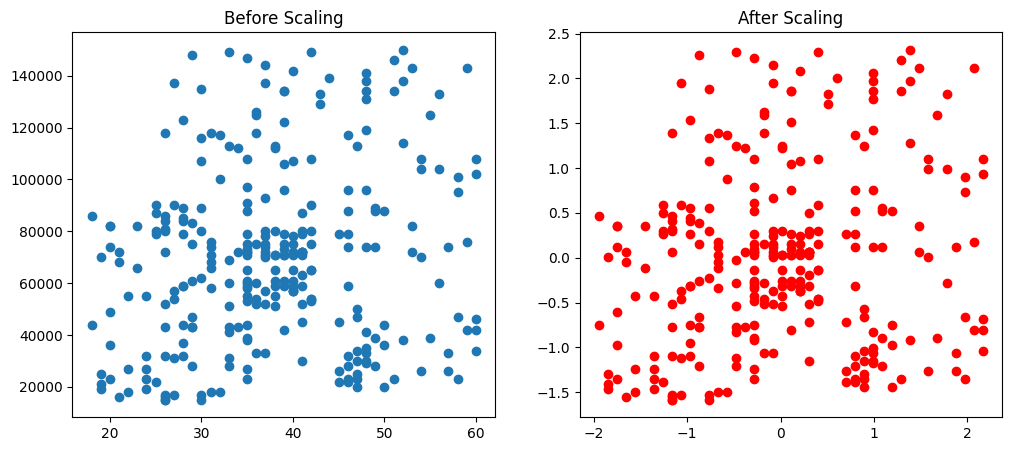

In [11]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color="red")
ax2.set_title('After Scaling')
plt.show()

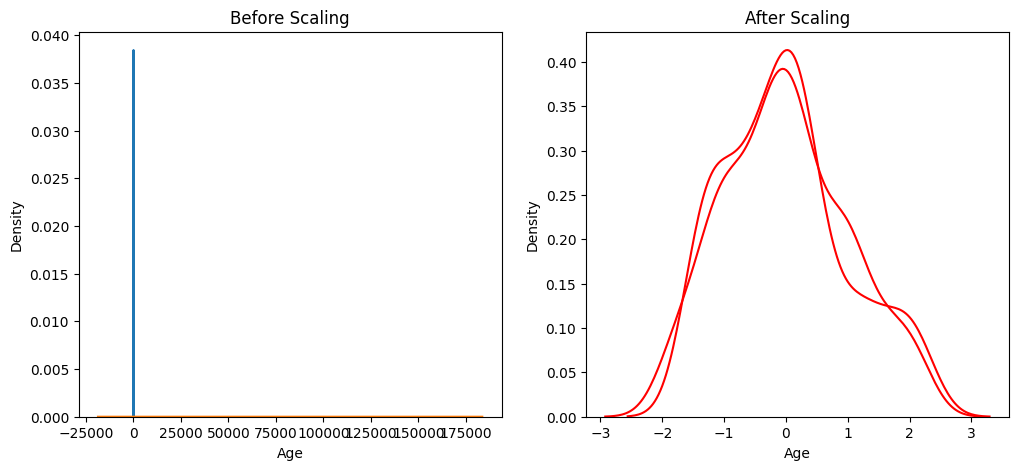

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,color="red")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,color="red")
ax2.set_title('After Scaling')
plt.show()

### Comparison of Distributions

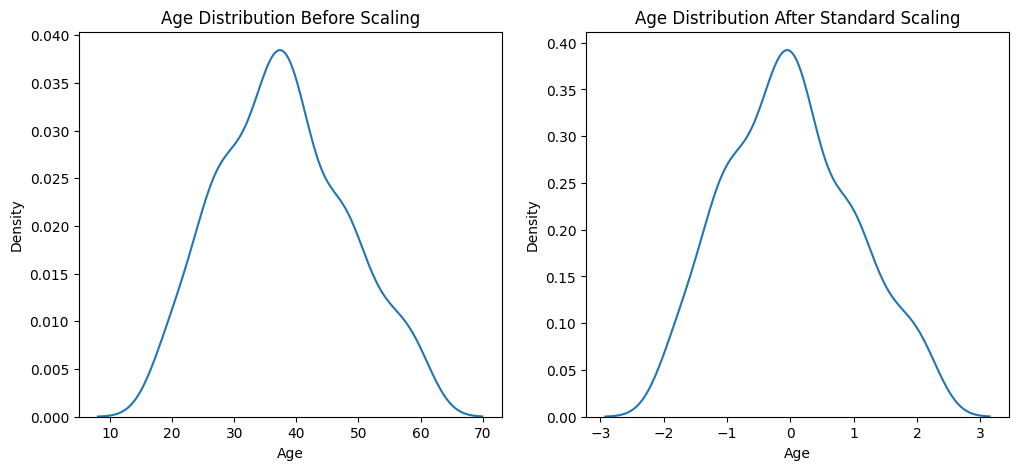

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

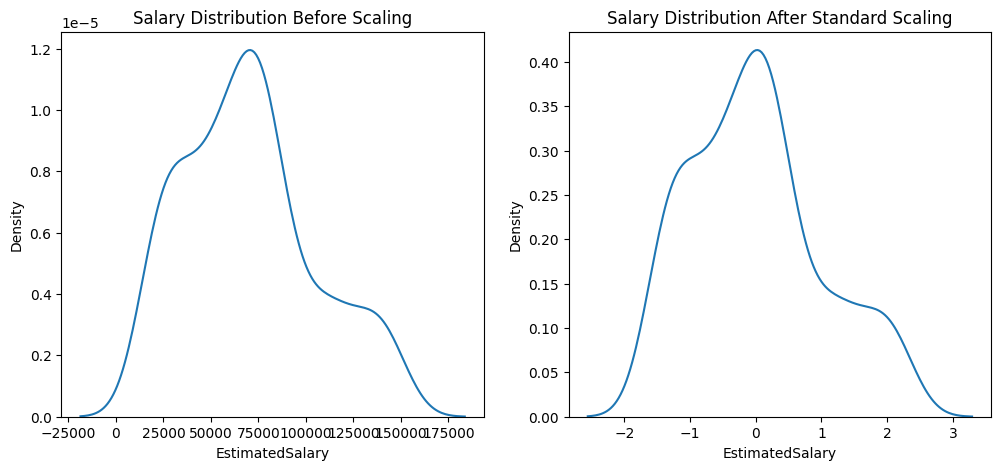

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why Scaling is Important?

In [15]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [25]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [28]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


### Effect of Outlier

In [39]:
data = pd.merge(data,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),how='outer')

In [40]:
data

,Age,EstimatedSalary,Purchased
0,5,1000,0
1,18,44000,0
2,18,52000,0
3,18,68000,0
4,18,82000,0
...,...,...,...
398,60,83000,1
399,60,102000,1
400,60,108000,1
401,90,250000,1


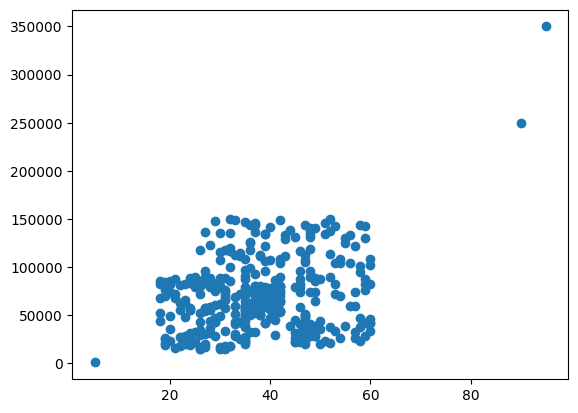

In [44]:
plt.scatter(data['Age'], data['EstimatedSalary'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis=1),data['Purchased'],test_size=0.3,random_state=0)

In [46]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

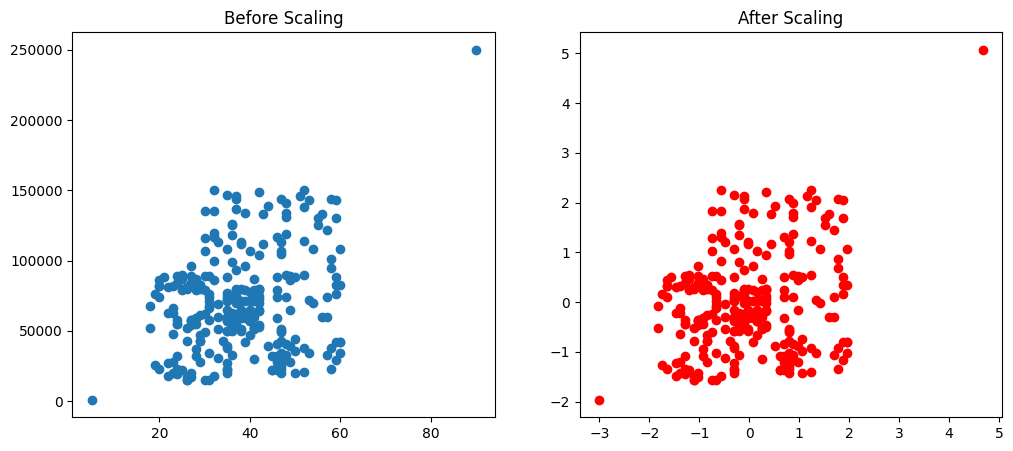

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()